In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.drop('Loan_ID',axis=1,inplace=True)

In [5]:
df.shape

(614, 12)

In [6]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
367,Male,No,0,Graduate,No,5124,0.0,124.0,NaN,0.0,Rural,N
410,Female,No,1,Not Graduate,Yes,3867,0.0,62.0,360.0,1.0,Semiurban,N
71,Male,Yes,2,Not Graduate,Yes,1875,1875.0,97.0,360.0,1.0,Semiurban,Y
468,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y
403,Female,No,0,Not Graduate,No,1963,0.0,53.0,360.0,1.0,Semiurban,Y


In [9]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


Checking Null Values Using Heatmap

<Axes: >

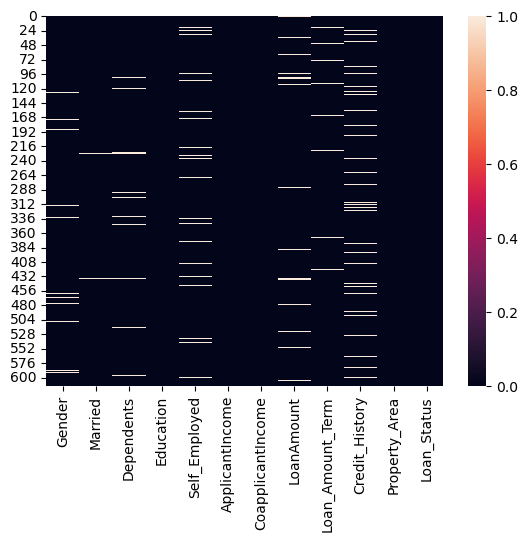

In [12]:
sns.heatmap(df.isnull())

As the white line indicates there are null values present in the dataset so we will check how much null values are there in the dataset-.

In [13]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

By this we'll get to know te count of the null values present in respective columns and will fill this values with mean and mode values.

In [14]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [15]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [16]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now we have replace all the null values using mode or medain for respective columns

Using Data Encoding we will replace the values with binary values

In [17]:
df['Loan_Status']=df.Loan_Status.map({'Y': 1,'N': 0}).astype(int)

In [18]:
df=df.replace({"Gender":{"Male":1,"Female":0}})

In [19]:
df=df.replace({"Married":{"Yes":1,"No":0}})

In [20]:
df['Self_Employed'].value_counts()
df=df.replace({"Self_Employed":{"Yes":1,"No":0}})

In [21]:
df['Education'].value_counts()
df=df.replace({"Education":{"Graduate":1,"Not Graduate":0}})

In [22]:
df['Property_Area'].value_counts()
df['Property_Area']=df['Property_Area'].map({'Rural':0,'Urban': 1,'Semiurban': 2})

In [23]:
df['Dependents']=df['Dependents'].replace('3+','3')
df['Dependents']=pd.to_numeric(df['Dependents'])

In [24]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1


Checking Correlation 

<Axes: >

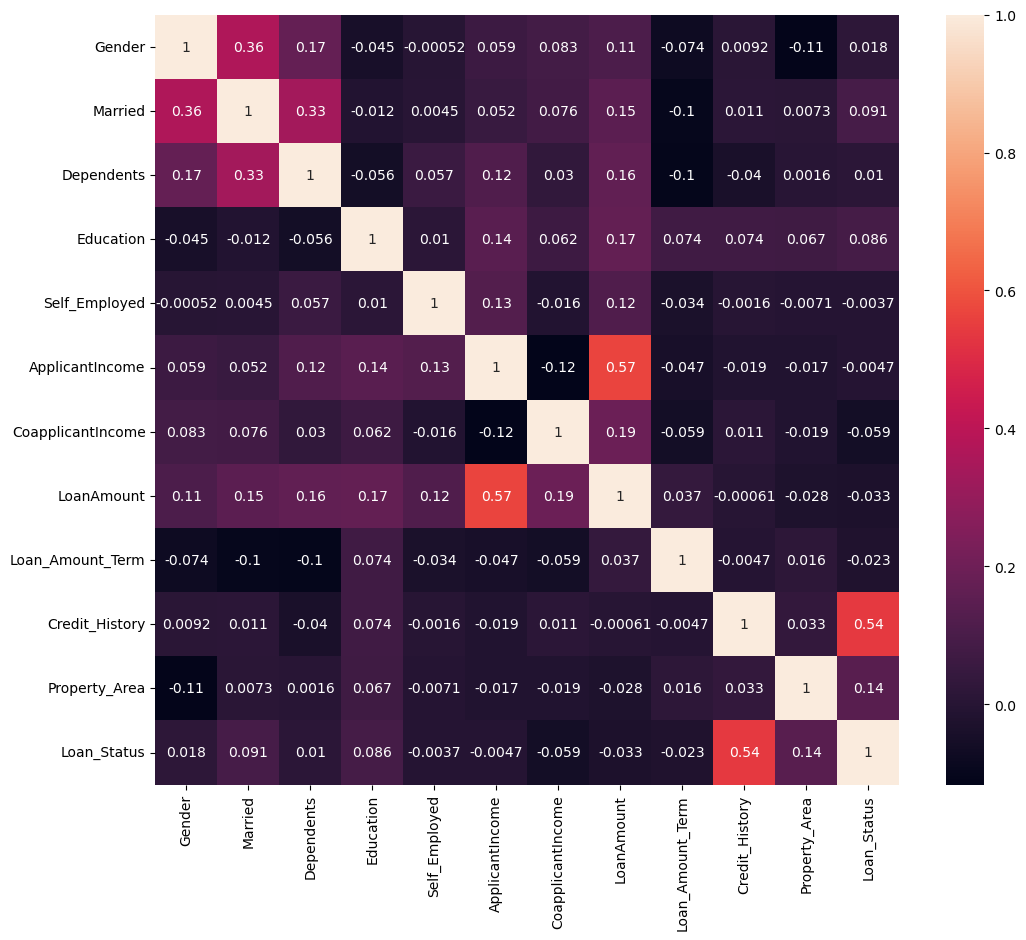

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

Data Visualisation

In [26]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

<Axes: xlabel='Loan_Status', ylabel='count'>

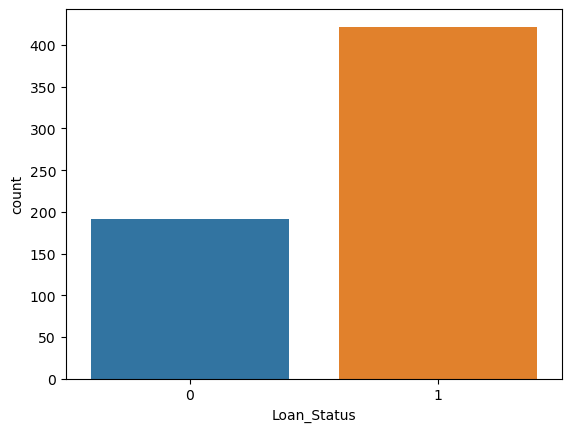

In [27]:
sns.countplot(data=df, x='Loan_Status')

In [28]:
df['Gender'].value_counts()

1    502
0    112
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

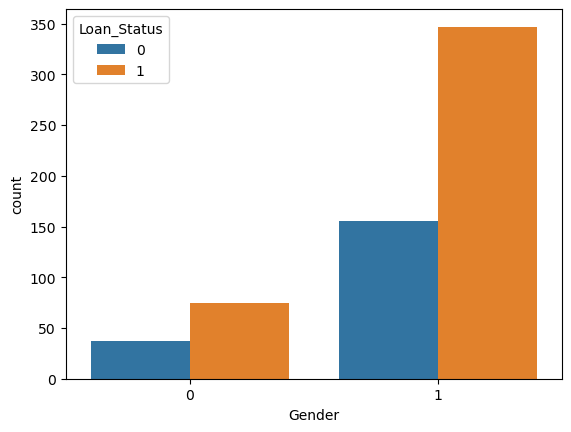

In [29]:
sns.countplot(data=df, x='Gender', hue='Loan_Status')

In [30]:
df['Married'].value_counts()

1    401
0    213
Name: Married, dtype: int64

<Axes: xlabel='Married', ylabel='count'>

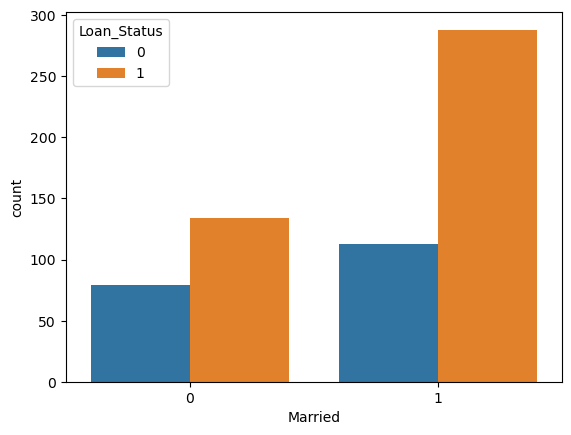

In [31]:

sns.countplot(data=df, x='Married', hue='Loan_Status')

In [32]:
df['Self_Employed'].value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

<Axes: xlabel='Self_Employed', ylabel='count'>

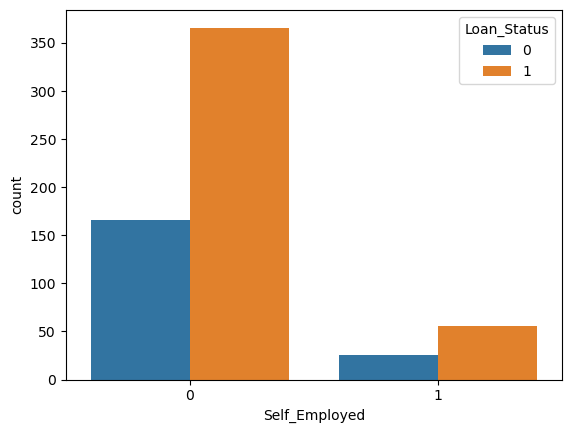

In [33]:
sns.countplot(data=df, x='Self_Employed', hue='Loan_Status')

In [34]:
df['Education'].value_counts()

1    480
0    134
Name: Education, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

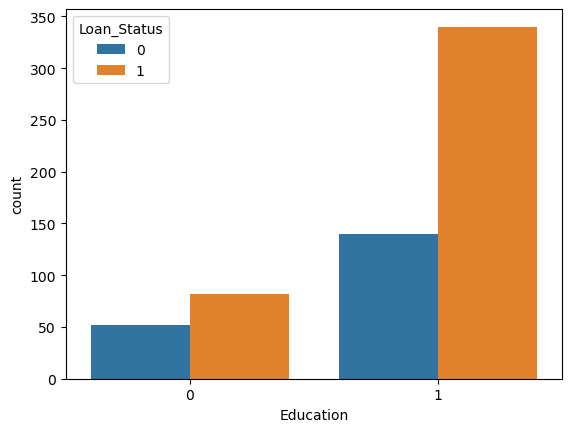

In [35]:

sns.countplot(data=df, x='Education', hue='Loan_Status')

In [36]:
df['Property_Area'].value_counts()

2    233
1    202
0    179
Name: Property_Area, dtype: int64

<Axes: xlabel='Property_Area', ylabel='count'>

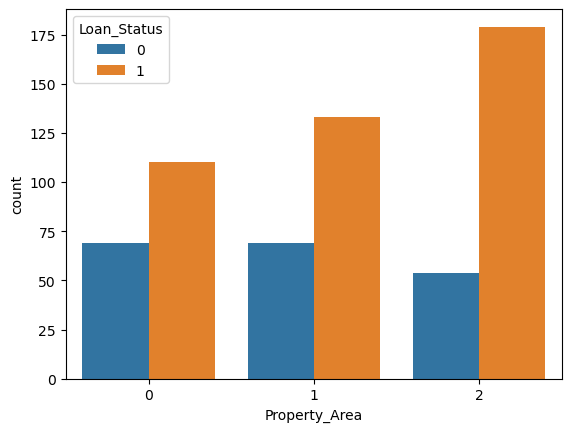

In [37]:
sns.countplot(data=df, x='Property_Area', hue='Loan_Status')

In [38]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

<Axes: xlabel='Credit_History', ylabel='count'>

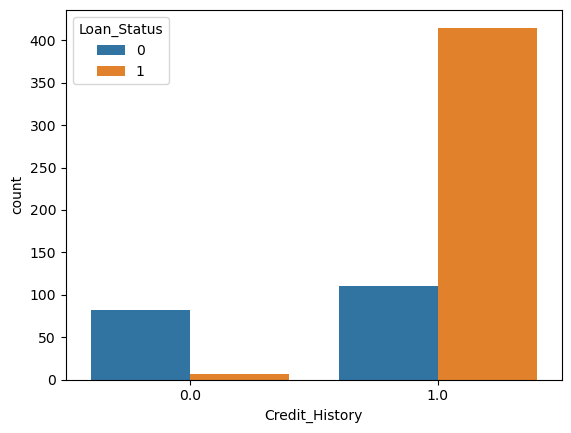

In [39]:
sns.countplot(data=df, x='Credit_History', hue='Loan_Status')

By checking all these relations we'll get to know that for which possible relations it is easy to get loan.

Checking Outliers

Gender                  Axes(0.125,0.712609;0.133621x0.167391)
Married              Axes(0.285345,0.712609;0.133621x0.167391)
Dependents            Axes(0.44569,0.712609;0.133621x0.167391)
Education            Axes(0.606034,0.712609;0.133621x0.167391)
Self_Employed        Axes(0.766379,0.712609;0.133621x0.167391)
ApplicantIncome         Axes(0.125,0.511739;0.133621x0.167391)
CoapplicantIncome    Axes(0.285345,0.511739;0.133621x0.167391)
LoanAmount            Axes(0.44569,0.511739;0.133621x0.167391)
Loan_Amount_Term     Axes(0.606034,0.511739;0.133621x0.167391)
Credit_History       Axes(0.766379,0.511739;0.133621x0.167391)
Property_Area            Axes(0.125,0.31087;0.133621x0.167391)
Loan_Status           Axes(0.285345,0.31087;0.133621x0.167391)
dtype: object

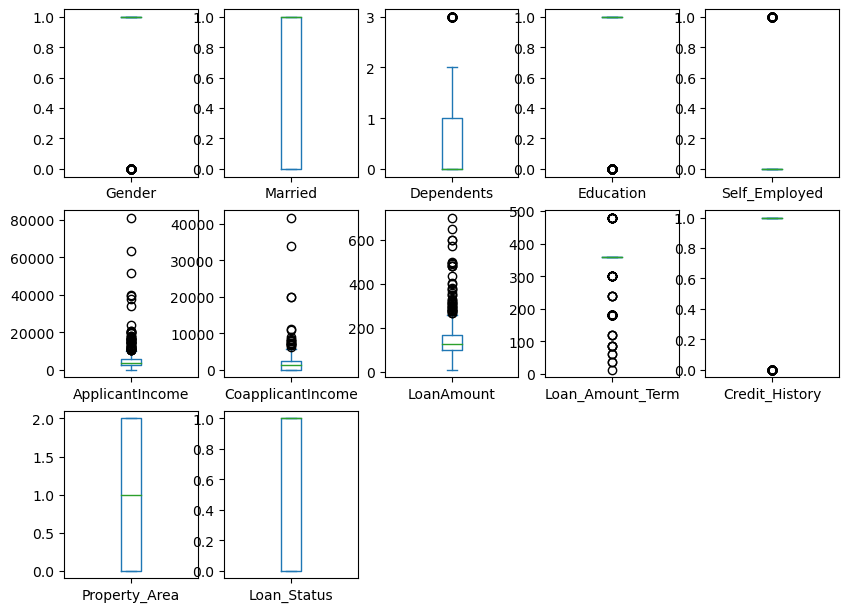

In [40]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(10,10))

Removing Outliers

In [41]:
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]

In [42]:
Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['CoapplicantIncome'] >= lower_bound) & (df['CoapplicantIncome'] <= upper_bound)]

In [43]:
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['LoanAmount'] >= lower_bound) & (df['LoanAmount'] <= upper_bound)]

In [44]:
Q1 = df['Loan_Amount_Term'].quantile(0.25)
Q3 = df['Loan_Amount_Term'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Loan_Amount_Term'] >= lower_bound) & (df['Loan_Amount_Term'] <= upper_bound)]

Gender                  Axes(0.125,0.712609;0.133621x0.167391)
Married              Axes(0.285345,0.712609;0.133621x0.167391)
Dependents            Axes(0.44569,0.712609;0.133621x0.167391)
Education            Axes(0.606034,0.712609;0.133621x0.167391)
Self_Employed        Axes(0.766379,0.712609;0.133621x0.167391)
ApplicantIncome         Axes(0.125,0.511739;0.133621x0.167391)
CoapplicantIncome    Axes(0.285345,0.511739;0.133621x0.167391)
LoanAmount            Axes(0.44569,0.511739;0.133621x0.167391)
Loan_Amount_Term     Axes(0.606034,0.511739;0.133621x0.167391)
Credit_History       Axes(0.766379,0.511739;0.133621x0.167391)
Property_Area            Axes(0.125,0.31087;0.133621x0.167391)
Loan_Status           Axes(0.285345,0.31087;0.133621x0.167391)
dtype: object

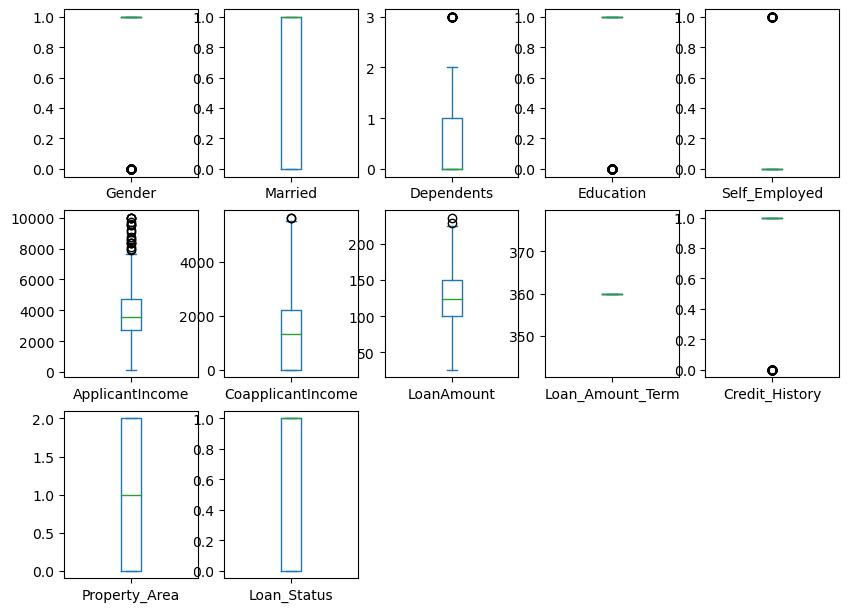

In [45]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(10,10))

Implementing ML

In [46]:
x=df.iloc[:,0:11]
y=df.iloc[:,11]

In [47]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
607,1,1,2,0,0,3987,1411.0,157.0,360.0,1.0,0
608,1,1,0,1,0,3232,1950.0,108.0,360.0,1.0,0
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1


In [48]:
y

0      1
1      0
2      1
3      1
4      1
      ..
607    1
608    1
609    1
612    1
613    0
Name: Loan_Status, Length: 445, dtype: int32

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(311, 11)
(134, 11)
(311,)
(134,)


In [50]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
RFCpred=RFC.predict(x_test)
RFCpred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0])

In [52]:
accuracy_score(y_test,RFCpred)

0.8283582089552238

In [53]:
confusion_matrix(y_test,RFCpred)

array([[17, 21],
       [ 2, 94]], dtype=int64)

In [54]:
print(classification_report(y_test,RFCpred))

              precision    recall  f1-score   support

           0       0.89      0.45      0.60        38
           1       0.82      0.98      0.89        96

    accuracy                           0.83       134
   macro avg       0.86      0.71      0.74       134
weighted avg       0.84      0.83      0.81       134



Accuracy Score=83%

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(356, 11)
(89, 11)
(356,)
(89,)


In [56]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [57]:
LRpred=LR.predict(x_test)
LRpred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0])

In [58]:
accuracy_score(y_test,LRpred)

0.8764044943820225

In [59]:
confusion_matrix(y_test,LRpred)

array([[10, 11],
       [ 0, 68]], dtype=int64)

In [60]:
print(classification_report(y_test,LRpred))

              precision    recall  f1-score   support

           0       1.00      0.48      0.65        21
           1       0.86      1.00      0.93        68

    accuracy                           0.88        89
   macro avg       0.93      0.74      0.79        89
weighted avg       0.89      0.88      0.86        89



Accuracy Score=87%